<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (10, 6)

# Предварительная обработка данных

In [3]:
df = pd.read_csv('../../input/YNDX_200101_200416.csv', sep = ',',index_col=False)
# Убираем лишние символы из названий столбцов
df = df.rename(columns=lambda x: x.replace('<', '').replace('>', '')) 
# Преобразование даты и времени
# Пример 2017-11-29 21:00:00
# df['DATE'] = df['DATE'].astype(object)
# df['TIME'] = df['TIME'].astype(object)
df['DATE_TIME'] = df.apply(lambda x: str(x['DATE'])[:4] + '-' + str(x['DATE'])[4:6] + '-' + str(x['DATE'])[6:8]
                           + ' ' + str(x['TIME'])[:2] + ':' + str(x['TIME'])[2:4] + ':' + str(x['TIME'])[4:6], axis=1)
df.DATE_TIME = pd.to_datetime(df.DATE_TIME)
df.index = df.DATE_TIME
df = df.drop(['DATE', 'TIME', 'DATE_TIME'], axis=1)
df[5:]

,OPEN,HIGH,LOW,CLOSE,VOL
DATE_TIME,,,,,
2020-01-03 10:06:00,2717.0,2717.6,2712.8,2717.2,617
2020-01-03 10:07:00,2717.0,2717.6,2715.2,2715.2,196
2020-01-03 10:08:00,2715.0,2716.8,2710.0,2715.0,1036
2020-01-03 10:09:00,2713.0,2714.8,2713.0,2713.2,231
2020-01-03 10:10:00,2713.2,2714.4,2711.8,2711.8,507
...,...,...,...,...,...
2020-04-16 18:39:00,2636.4,2636.8,2634.4,2635.0,397
2020-04-16 18:40:00,2635.0,2636.6,2633.6,2636.0,4402
2020-04-16 18:46:00,2637.8,2637.8,2637.8,2637.8,6408


In [75]:
df.dtypes

OPEN     float64
HIGH     float64
LOW      float64
CLOSE    float64
VOL        int64
dtype: object

In [4]:
df.index

DatetimeIndex(['2020-01-03 11:00:00', '2020-01-03 12:00:00',
               '2020-01-03 13:00:00', '2020-01-03 14:00:00',
               '2020-01-03 15:00:00', '2020-01-03 16:00:00',
               '2020-01-03 17:00:00', '2020-01-03 18:00:00',
               '2020-01-03 19:00:00', '2020-01-06 11:00:00',
               ...
               '2020-04-15 19:00:00', '2020-04-16 11:00:00',
               '2020-04-16 12:00:00', '2020-04-16 13:00:00',
               '2020-04-16 14:00:00', '2020-04-16 15:00:00',
               '2020-04-16 16:00:00', '2020-04-16 17:00:00',
               '2020-04-16 18:00:00', '2020-04-16 19:00:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=648, freq=None)

In [9]:
df[df.index == '2020-01-03 11:00:00'].values

array([[ 2712.2,  2718. ,  2697.4,  2711. , 25104. ]])

# Ключевые даты

In [76]:
# Даты падения
drop_data_list = ['2020-03-12']
timestamp = pd.Timestamp(drop_data_list[0])
timestamp

Timestamp('2020-03-12 00:00:00')

In [77]:
df.loc[:,['OPEN','CLOSE','LOW','HIGH']].resample('D').last()

,OPEN,CLOSE,LOW,HIGH
DATE_TIME,,,,
2020-01-03,2692.6,2685.0,2677.4,2693.4
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
2020-01-06,2660.6,2672.0,2657.0,2672.8
2020-01-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-04-12,NaN,NaN,NaN,NaN
2020-04-13,2642.8,2659.0,2641.0,2659.0
2020-04-14,2752.2,2755.6,2736.0,2760.0


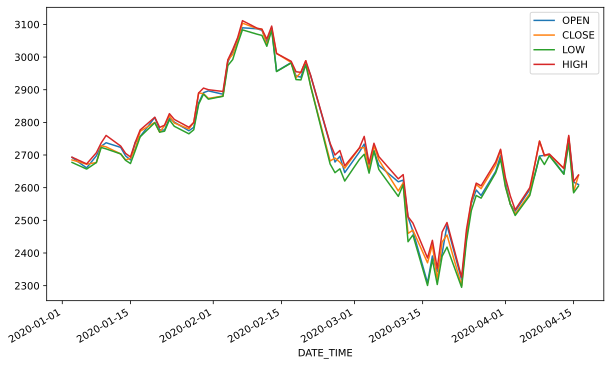

In [80]:
# df = df.dropna
df.loc[:,['OPEN','CLOSE','LOW','HIGH']].resample('D').last().dropna().plot()

In [81]:
from statsmodels.graphics.tsaplots import plot_acf

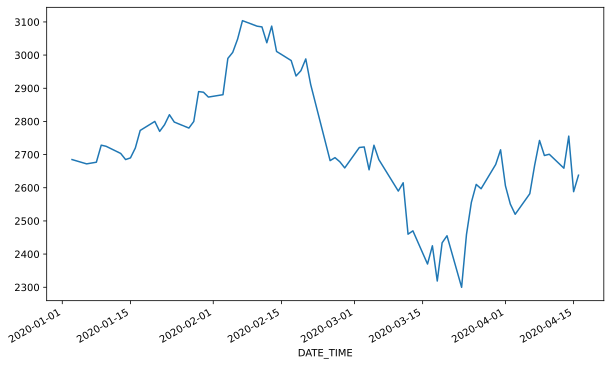

In [87]:
price_close = df.CLOSE.resample('D').last().dropna()
price_close.plot()

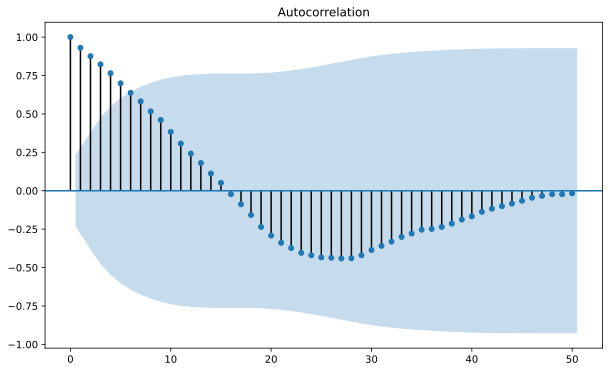

In [88]:
# Строим график автокорреляции
plot_acf(price_close, lags=50);

In [98]:
from statsmodels.tsa.arima_model import ARIMA
# Обучаем модель
price_close_to_model = price_close[price_close.index<=timestamp]
model = ARIMA(price_close_to_model, order=(2,1,1));
model_fit = model.fit();
model_fit.summary()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.CLOSE   No. Observations:                   46
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -252.532
Method:                       css-mle   S.D. of innovations             58.585
Date:                Fri, 17 Apr 2020   AIC                            515.064
Time:                        00:15:03   BIC                            524.207
Sample:                             1   HQIC                           518.489
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.9320      8.686     -0.568      0.570     -21.957      12.093
ar.L1.D.CLOSE    -0.5463      0.584     -0.936      0.349      -1.690       0.598
ar.L2.D.CLOSE    -0.0604      0.175     -0.345      0.730      -0.403       0.282
ma.L1.D.CLOSE     0.6109      0.559      1.092      0.275      -0.485       1.707
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5477           +0.0000j            2.5477            0.5000
AR.2           -6.5030           +0.0000j            6.5030            0.5000
MA.1           -1.6370           +0.0000j            1.6370            0.5000
-----------------------------------------------------------------------------
"""

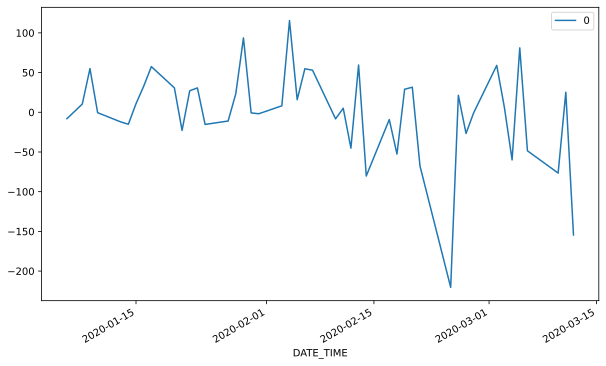

In [101]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

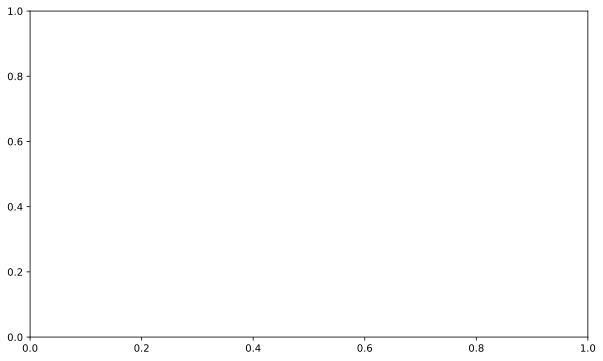

In [102]:
start_index = '2020-2-01'
end_index = '2020-3-17'
model_fit.plot_predict(start = start_index ,end = end_index);

In [103]:
start_index = '2020-03-06'
ppise_predict = model_fit.predict(start=start_index, end = end_index, typ='levels')
ppise_predict

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [26]:
timestamp

Timestamp('2020-03-12 00:00:00')

In [55]:
out_data = df.loc[:,['CLOSE']][df.index>='2020-03-06']
out_data = out_data[out_data.index<='2020-03-17'].resample('D').last()
out_data['ppise_predict'] = ppise_predict
out_data = out_data.dropna()
out_data['Fails'] = out_data.apply(lambda x: x['CLOSE']-x['ppise_predict'], axis=1)
out_data

,CLOSE,ppise_predict,Fails
DATE_TIME,,,
2020-03-06,2685.0,2669.728360,15.271640
2020-03-10,2590.0,2679.870401,-89.870401
2020-03-11,2615.0,2682.465467,-67.465467
2020-03-12,2460.0,2598.213490,-138.213490
2020-03-13,2470.0,2608.286301,-138.286301
2020-03-16,2370.0,2589.455484,-219.455484
